**merging dataset**

In [ ]:
dataset2008=pd.read_excel('/content/2008.xlsx')
dataset2009=pd.read_excel('/content/2009.xlsx')
dataset2010=pd.read_excel('/content/2010.xlsx')
dataset2011=pd.read_excel('/content/2011.xlsx')
dataset2012=pd.read_excel('/content/2012.xlsx')
dataset2013=pd.read_excel('/content/2013.xlsx')
dataset2014=pd.read_excel('/content/2014.xlsx')
dataset2015=pd.read_excel('/content/2015.xlsx')
dataset2016=pd.read_excel('/content/2016.xlsx')
dataset2017=pd.read_excel('/content/2017.xlsx')
dataset2018=pd.read_excel('/content/2018.xlsx')
dataset2019=pd.read_excel('/content/2019.xlsx')


In [ ]:
frames = [dataset2008,dataset2009, dataset2010,dataset2011,dataset2012,dataset2013,dataset2014,dataset2015,dataset2016,
         dataset2017,dataset2018,dataset2019]
result = pd.concat(frames,ignore_index=True)
result.head()

In [ ]:
print(result.shape)

<h1>Start</h1>

In [ ]:
import pandas as pd
import numpy as np
import re 

In [ ]:
dataset=pd.read_excel('/content/dataset_gis.xlsx')
data=dataset[['Abstract','Year Published','Keywords']].copy()
data.head()

,Abstract,Year Published,Keywords
0,Despite a heightened focus on sustainable tran...,2008,"Sweden, sugar beet transport, proximity analys..."
1,Confined poultry (broiler) production in Alaba...,2008,"Broiler litter, Poultry litter, Decision suppo..."
2,Extraction of short-wood from harvesting opera...,2008,"Russia, logging, cut-to-length, logistics, del..."
3,TRANSASIST is an intelligent system for the ma...,2008,"Intelligent management system, urban transport..."
4,Hazardous materials routing constitutes a crit...,2008,"Decision support systems, Bi-objective routing..."


In [ ]:
dataset.head()

,Unnamed: 0,Authors,Title,Keywords,Publication Name,Year Published,Abstract
0,0,"Ness, Barry; Brogaard, Sara",GIS proximity analysis and environmental asses...,"Sweden, sugar beet transport, proximity analys...",AREA,2008,Despite a heightened focus on sustainable tran...
1,1,"Kang, M. S.; Srivastava, P.; Tyson, T.; Fulton...",A comprehensive GIS-based poultry litter manag...,"Broiler litter, Poultry litter, Decision suppo...",COMPUTERS AND ELECTRONICS IN AGRICULTURE,2008,Confined poultry (broiler) production in Alaba...
2,2,"Gerasimov, Yuri; Sokolov, Anton; Karjalainen, ...",GIS-Based Decision Support Program for Plannin...,"Russia, logging, cut-to-length, logistics, del...",CROATIAN JOURNAL OF FOREST ENGINEERING,2008,Extraction of short-wood from harvesting opera...
3,3,"Hrin, Gabriela Rodica; Anghel, Lucian Emanuel;...",Solutions for Finding the Optimum Route betwee...,"Intelligent management system, urban transport...",STUDIES IN INFORMATICS AND CONTROL,2008,TRANSASIST is an intelligent system for the ma...
4,4,"Zografos, Konstantinos G.; Androutsopoulos, Ko...",A decision support system for integrated hazar...,"Decision support systems, Bi-objective routing...",TRANSPORTATION RESEARCH PART C-EMERGING TECHNO...,2008,Hazardous materials routing constitutes a crit...


In [ ]:
subset=pd.read_excel('/content/Subset 2.xlsx')
subset.head()

,second,main
0,gis,geographical information system
1,geographic information system,geographical information system
2,geographical information systems,geographical information system
3,geospatial information system,geographical information system
4,geographic information systems,geographical information system


In [ ]:
def lowalpha(text):
    return text.lower()

second=subset['second'].map(lowalpha)
main=subset['main'].map(lowalpha)

In [ ]:
text_dic={}
zip_list=zip(second,main)
for word in zip_list:
    text_dic[word[0]]=word[1]

In [ ]:

def remove_p(text):
    return re.sub(r"\(.*?\)",'',text)

def only_text(text):
    return re.sub(r"[^A-Za-z \s]",'',text)

def tex_to_main(text):
    for e in list(text_dic.keys()):
        if e in text:
            text=text.replace(e,text_dic[e])
    return text


data['Abstract']=data['Abstract'].map(lowalpha)
#data['Abstract']=data['Abstract'].map(tex_to_main)
data['Abstract']=data['Abstract'].map(remove_p)
#data['Abstract']=data['Abstract'].map(only_text)

importing tools!

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Defrining our special stopwords

In [ ]:
f=open("/content/stopwords_plus.txt", "r").read()
s_stopwords = word_tokenize(f)[1:]

print(s_stopwords)
stopwords=stopwords.words('english')
print(stopwords)

['absence', 'access', 'account', 'actions', 'activities', 'activity', 'addition', 'adds', 'advantages', 'advance', 'advanced', 'database', 'applications', 'advances', 'advantage', 'advice', 'agreement', 'aim', 'alternative', 'alternatives', 'analysis', 'analyst', 'analysts', 'analyzing', 'applicability', 'application', 'applications', 'approach', 'approaches', 'appropriate', 'level', 'appropriate', 'representations', 'arbitrary', 'number', 'area', 'areas', 'article', 'aspect', 'aspects', 'association', 'attempts', 'attempt', 'attention', 'attribute', 'values', 'attributes', 'authors', 'availability', 'available', 'data', 'base', 'management', 'system', 'basic', 'concepts', 'basic', 'idea', 'basis', 'body', 'briefly', 'broad', 'range', 'bulk', 'burden', 'candidate', 'capabilities', 'case', 'cases', 'cause', 'causes', 'challenge', 'challenging', 'issue', 'challenging', 'problem', 'challenging', 'task', 'chances', 'changes', 'characteristic', 'characteristics', 'characterization', 'circum

In [ ]:
#gis_stopwords=['transport','decision','travel', 'distanc','region','neighborhood','neighborhood','power','traffic','road'
              ,'gis','vehicl','land','network']

"'gis','vehicl','land','network']"

preprocessing: lower text, tokenizing, keeping only nouns, removing any other charcter and numbers, removing stop words and words with len <3, creating a list of preprocessed documents!

In [ ]:
stemmer= PorterStemmer()
sstopwords=list([stemmer.stem(e) for e in s_stopwords])

In [ ]:
docs=[]
for e in data['Abstract']:
    text=e.lower()
    atext=re.sub('[^a-zA-Z]+', ' ', text)
    tokens = nltk.word_tokenize(atext)
    tags = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    stem=[stemmer.stem(e) for e in nouns]
    rtext=[e for e in stem if e not in s_stopwords+stopwords+sstopwords and len(e)>=3]
    docs.append(' '.join(rtext))

In [ ]:
docs[1]

'poultri ton litter poultri plateau region alabama region land litter buildup phosphoru soil runoff pathogen land belt region alabama suffer economi soil fertil poultri litter alabama litter plateau region region south util belt region henc wast strategi farm litter util alabama poultri litter decis farm poultri litter plateau belt region alabama pldss transport poultri litter arcobject network arcgi pldss poultri litter transport litter deficit pldss produc cost poultri litter alabama'

In [ ]:
data['Abstract'][1]

"confined poultry  production in alabama results in about 1.8 million tons of litter annually. because poultry production mainly occurs in the appalachian plateau region of north alabama, this region suffers from excessive land application of litter, resulting in buildup of phosphorus  in soils and runoff of pathogens and p from land-applied areas. conversely, the black belt region of south-central alabama suffers from depressed agricultural economy because of poor soil fertility. in order to achieve optimal poultry litter management in alabama, litter produced in the concentrated production areas within the appalachian plateau region must be optimally distributed in this region or transported south for utilization in the black belt region. hence, a comprehensive system to provide improved waste management strategies  for sustainable on- and off-farm litter utilization in alabama is needed. the primary focus of this study was to develop a comprehensive, geographic information system -i

**Visualizing word freq**

In [ ]:
'''
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 40), dpi=80, facecolor='w', edgecolor='k')
vectorizer = CountVectorizer()
doc       = vectorizer.fit_transform(docs)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(doc)
visualizer.poof()
'''

"\nfrom yellowbrick.text import FreqDistVisualizer\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(20, 40), dpi=80, facecolor='w', edgecolor='k')\nvectorizer = CountVectorizer()\ndoc       = vectorizer.fit_transform(docs)\nfeatures   = vectorizer.get_feature_names()\n\nvisualizer = FreqDistVisualizer(features=features)\nvisualizer.fit(doc)\nvisualizer.poof()\n"

applying TFID and BOW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizertf = TfidfVectorizer(analyzer='word',       
                             min_df=5,
                             max_features=50000,             # max number of uniq words
                            )
data_vectorizedtf = vectorizertf.fit_transform(docs)
data_vectorizedtf

<1125x929 sparse matrix of type '<class 'numpy.float64'>'
	with 21769 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf = pd.DataFrame(data_vectorizedtf.toarray(),columns=vectorizertf.get_feature_names())
tfidf.head()

,abil,abm,abstract,acceler,acceleromet,accept,accid,accord,accur,accuraci,achiev,acquisit,act,actor,adapt,address,adjust,administr,adolesc,adopt,adult,aesthet,age,agenc,agent,agglomer,aggreg,agricultur,ahp,aid,air,aircraft,airport,align,alloc,amen,america,analys,analyt,anim,...,veget,vehicl,veloc,versu,vicin,viewpoint,villag,visibl,visit,visitor,visual,vrp,vulner,walk,walkabl,ward,washington,wast,water,waterway,weather,week,weight,welfar,well,west,wherea,whole,width,window,winter,women,wood,worker,workflow,workplac,yield,york,zealand,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.332134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.217494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795386,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.327082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.082111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


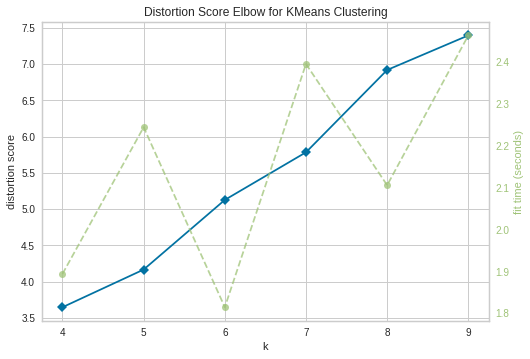

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,10))

visualizer.fit(tfidf)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

dimentionality reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [ ]:
svd = TruncatedSVD(900).fit(tfidf)

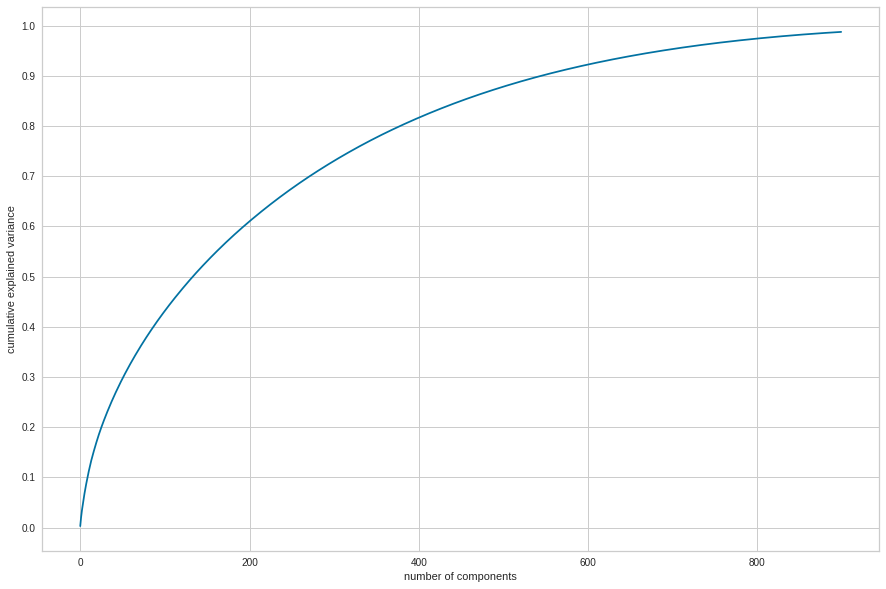

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

In [ ]:
singular_cumsum=np.cumsum(svd.explained_variance_ratio_)
singular_cumsum[400]

0.8165963734357168

<h3>creating a new dataframed based on extracted components</h3>
by 400 component we can explaine 90% of our data variance

In [ ]:
svd = TruncatedSVD(2).fit(tfidf)
X_2d=svd.fit_transform(tfidf)
svd_df=pd.DataFrame(X_2d,columns=['pc1','pc2'])
svd_df.head()

,pc1,pc2
0,0.252665,0.072379
1,0.198345,0.115437
2,0.144038,0.036498
3,0.313013,-0.005429
4,0.174860,0.023408


In [ ]:
svd_df['year']=data['Year Published']
svd_df.head()

,pc1,pc2,year
0,0.252665,0.072379,2008
1,0.198345,0.115437,2008
2,0.144038,0.036498,2008
3,0.313013,-0.005429,2008
4,0.174860,0.023408,2008


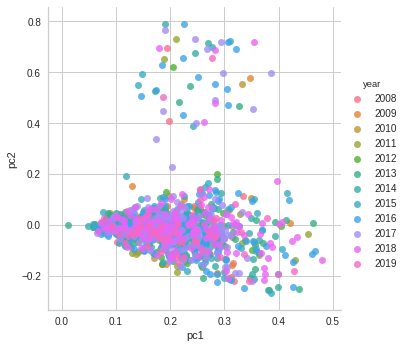

In [ ]:
import seaborn as sns
sns.lmplot('pc1','pc2',svd_df,hue='year',fit_reg=False);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(svd_df[['pc1','pc2']])

In [ ]:
labels=kmeans.predict(svd_df[['pc1','pc2']])

In [ ]:
svd_df['cluster']=labels

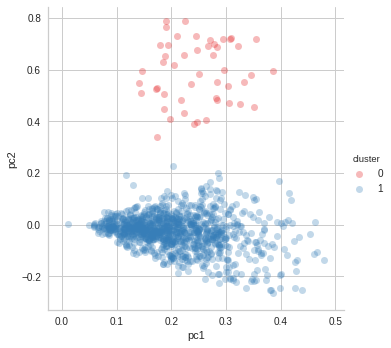

In [ ]:
sns.lmplot('pc1','pc2',svd_df,hue='cluster',fit_reg=False,palette="Set1",scatter_kws={'alpha':0.3});

In [ ]:
svd_df['cluster'].value_counts()

1    1076
0      49
Name: cluster, dtype: int64

In [ ]:
tfidf['label']=labels

In [ ]:
fr_key0=tfidf.loc[tfidf['label'] == 0].sum()
fr_key0.sort_values(ascending=False)[0:50]

wast          29.892050
cost           5.609492
rout           5.214187
dispos         4.489465
vehicl         3.519465
transport      3.180287
citi           2.703550
treatment      2.557045
landfil        2.229462
scenario       2.201494
transfer       2.078817
fuel           2.059295
center         1.827400
msw            1.729979
reduct         1.591090
save           1.559902
decis          1.537053
consumpt       1.470634
station        1.433781
bin            1.391546
emiss          1.362811
paramet        1.287146
plant          1.269881
municip        1.264478
distanc        1.259070
popul          1.210880
capac          1.171957
capit          1.169957
inciner        1.162012
countri        1.151935
resourc        1.073188
select         0.985785
recycl         0.957707
segreg         0.952163
strategi       0.925718
map            0.898513
sensit         0.895875
expenditur     0.881621
truck          0.869667
ward           0.811349
region         0.808603
ton            0

In [ ]:
fr_key1=tfidf.loc[tfidf['label'] == 1].sum()
fr_key1.sort_values(ascending=False)[1:50]

transport        81.057024
road             62.364732
network          60.871828
traffic          43.322660
travel           38.617294
citi             37.174360
vehicl           35.036028
rout             34.974939
transit          31.961342
land             30.675167
environ          29.216418
measur           28.828267
cost             27.644076
popul            27.098617
distanc          25.944966
decis            24.669362
infrastructur    23.360575
mode             23.099398
station          22.337522
map              21.599205
risk             21.420949
health           20.747032
emiss            20.144522
region           19.517012
school           19.366243
densiti          19.197706
trip             19.010956
mobil            18.475221
nois             18.232297
scenario         18.194317
accid            17.885894
neighborhood     17.518326
distribut        17.281500
safeti           17.185434
crash            17.091230
street           16.820941
path             16.498886
w

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.





## lemmatizer version




In [ ]:
docs=[]
for e in data['Abstract']:
    text=e.lower()
    atext=re.sub('[^a-zA-Z]+', ' ', text)
    tokens = nltk.word_tokenize(atext)
    tags = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    stem=[lemmatizer.lemmatize(e) for e in nouns]
    rtext=[e for e in stem if e not in s_stopwords+stopwords+sstopwords and len(e)>=3]
    docs.append(' '.join(rtext))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizertf = TfidfVectorizer(analyzer='word',       
                             min_df=5,
                             max_features=50000,             # max number of uniq words
                            )
data_vectorizedtf = vectorizertf.fit_transform(docs)
data_vectorizedtf

<1125x997 sparse matrix of type '<class 'numpy.float64'>'
	with 24032 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf = pd.DataFrame(data_vectorizedtf.toarray(),columns=vectorizertf.get_feature_names())
tfidf.head()

,ability,abm,abstract,acceleration,accelerometer,acceptance,accessibility,accident,accordance,accuracy,accurate,acquisition,act,actor,adaptation,address,adjustment,administration,adolescent,adoption,adult,advancement,aesthetic,age,agency,agent,agglomeration,aggregate,aggregation,agriculture,ahp,aid,air,aircraft,airport,alignment,allocation,amenity,america,analytics,...,vegetation,vehicle,velocity,versus,vicinity,viewpoint,village,visibility,visitor,visualization,vrp,vulnerability,walk,walkability,walking,ward,washington,waste,water,waterway,weather,week,weight,welfare,well,west,whereas,whole,width,window,winter,woman,wood,worker,workflow,workplace,yield,york,zealand,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.208474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.768769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.270175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078456,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
svd = TruncatedSVD(2).fit(tfidf)
X_2d=svd.fit_transform(tfidf)
svd_df=pd.DataFrame(X_2d,columns=['pc1','pc2'])
svd_df.head()

,pc1,pc2
0,0.240452,0.090338
1,0.191536,0.078306
2,0.150420,0.068652
3,0.236674,-0.014631
4,0.189378,0.070020


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(svd_df[['pc1','pc2']])

In [ ]:
labels=kmeans.predict(svd_df[['pc1','pc2']])

In [ ]:
svd_df['cluster']=labels

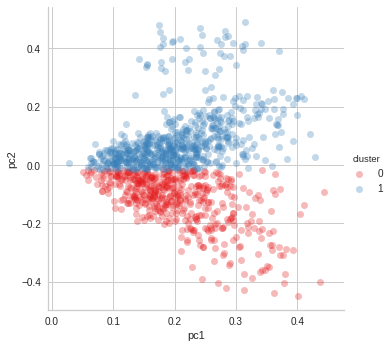

In [ ]:
sns.lmplot('pc1','pc2',svd_df,hue='cluster',fit_reg=False,palette="Set1",scatter_kws={'alpha':0.3});

In [ ]:
tfidf['label']=labels

In [ ]:
tfidf['label'].value_counts()

1    637
0    488
Name: label, dtype: int64

In [ ]:
fr_key0=tfidf.loc[tfidf['label'] == 0].sum()
fr_key0.sort_values(ascending=False)[0:50]

transportationation         60.918056
accessibility               41.657203
network                     41.282143
transportation              35.335247
travel                      31.867322
city                        31.736593
vehicle                     30.385105
waste                       29.316042
route                       28.785162
transit                     28.336186
land                        27.857798
location                    26.621505
environment                 25.250114
cost                        25.059125
population                  24.136139
distance                    22.746239
infrastructure              22.608768
measure                     22.083360
road                        22.075754
station                     21.650005
decision                    21.211973
planning                    19.843599
mode                        19.511264
school                      18.703872
health                      18.658678
scenario                    17.412927
change      

In [ ]:
fr_key1=tfidf.loc[tfidf['label'] == 1].sum()
fr_key1.sort_values(ascending=False)[1:50]

traffic                42.530840
road                   38.141856
network                16.032307
accident               15.074610
noise                  14.431893
transportationation     9.787933
crash                   9.589712
risk                    7.232651
vehicle                 6.678899
safety                  5.861114
material                5.752563
exposure                5.658992
congestion              5.622399
cost                    5.339933
transportation          5.316184
city                    5.131329
pollution               4.788907
forest                  4.293669
planning                4.275363
path                    4.189392
emission                4.001936
positioning             3.900781
route                   3.748752
speed                   3.694142
map                     3.564603
segment                 3.445682
region                  3.395830
length                  3.357556
car                     3.343834
density                 3.307999
distributi

BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizerbow = CountVectorizer(
                             max_features=50000,             # max number of uniq words
                            )
data_bow = vectorizerbow.fit_transform(docs)
data_bow

In [ ]:
bowdf = pd.DataFrame(data_bow.toarray(),columns=vectorizerbow.get_feature_names())
bowdf.head()

In [ ]:
bowdf['label']=labels

In [ ]:
fr_key0=bowdf.loc[bowdf['label'] == 0].sum()
fr_key0.sort_values(ascending=False)[0:50]

In [ ]:
fr_key1=bowdf.loc[bowdf['label'] == 1].sum()
fr_key1.sort_values(ascending=False)[0:50]

<h1>Jurnal frequencies</h1>

In [ ]:
dataset['Publication Name'].value_counts()

In [ ]:
dataset['count']=1
counter=dataset[['count','Publication Name']].groupby('Publication Name').count().sort_values(by=['count'],ascending=False)

In [ ]:
counter.iloc[:14,:]

In [ ]:

import plotly.graph_objects as go

In [ ]:
df = pd.read_excel('/content/JurnalPublicationsFrequency.xlsx')
df=df.iloc[:14,:]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df['Publication Name'],df['count']],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [ ]:
import plotly.express as px

In [ ]:
gapminder=pd.read_excel('/content/TopNineJurnalTabels.xlsx')
gapminder.head()

In [ ]:
fig = px.area(gapminder, x="Year", y="Number Of Publications", color="Name",
	      line_group="Name", width=800, height=600)
fig.update_xaxes(dtick=1,ticks="outside")
fig.update_yaxes(dtick=1,range=[0, 40], autorange=False)
fig.show()

jurnal trends based on publication year

In [ ]:
from functools import reduce
authors=reduce(lambda x,y: x+y,authors)

Authors frequency

In [ ]:
authors=[]
for e in dataset['Authors']:
    names=str(e).lower()
    names_list=names.split(';')
    for w in names_list:
        authors.append(w.strip())

In [ ]:
authors_freq=pd.Series(authors).value_counts()

In [ ]:
authors_freq_df=pd.DataFrame(authors_freq.keys(),columns=['Authors'])
authors_freq_df['Publication Number']=authors_freq.values

In [ ]:
authors_freq_df.head(10)

In [ ]:
authors_freq_df.to_excel('authors_freq_df.xlsx')

keywords frequency

In [ ]:
keywords=[]
for key in dataset['Keywords']:
    removed_text=re.sub("[\(\[].*?[\)\]]", "", str(key)).lower()
    keylist=removed_text.split(',')
    for word in keylist:
        stemed=[]
        token_list=word_tokenize(word)
        for token in token_list:
            stemed.append(lemmatizer.lemmatize((token.strip())))
        keywords.append(' '.join(stemed))

In [ ]:
keywords_series=pd.Series(keywords)
keywords_series.value_counts()

In [ ]:
counter=keywords_series.value_counts()
fr_keywords=pd.DataFrame(counter.keys(),columns=['keywords'])
fr_keywords['count']=counter.values

In [ ]:
fr_keywords.head(20)

In [ ]:
fr_keywords.to_excel('fr_keywords.xlsx')

<h1>Changing test</h1>

In [ ]:
test=dataset[['Abstract']].copy()
test.head()

In [ ]:
subset=pd.read_excel('/content/Subset 2.xlsx')
subset.head()

In [ ]:
second=subset['second'].map(lowalpha)
second=subset['main'].map(lowalpha)

In [ ]:
text_dic={}
zip_list=zip(second,main)
for word in zip_list:
    text_dic[word[0]]=word[1]

In [ ]:
def lowalpha(text):
    return str(text).lower()

def remove_p(text):
    return re.sub(r"\(.*?\)",'',text)

def only_text(text):
    return re.sub(r"[^A-Za-z \s]",'',text)

def tex_to_main(text):
    for e in list(text_dic.keys()):
        if e in text:
            text=text.replace(e,text_dic[e])
    return text

'''
test['Abstract']=test['Abstract'].map(lowalpha)
test['Abstract']=test['Abstract'].map(tex_to_main)
test['Abstract']=test['Abstract'].map(remove_p)
test['Abstract']=test['Abstract'].map(only_text)

'''

"\ntest['Abstract']=test['Abstract'].map(lowalpha)\ntest['Abstract']=test['Abstract'].map(tex_to_main)\ntest['Abstract']=test['Abstract'].map(remove_p)\ntest['Abstract']=test['Abstract'].map(only_text)\n\n"

In [ ]:
data.head()

,Abstract,Year Published,Keywords
0,Despite a heightened focus on sustainable tran...,2008,"Sweden, sugar beet transport, proximity analys..."
1,Confined poultry (broiler) production in Alaba...,2008,"Broiler litter, Poultry litter, Decision suppo..."
2,Extraction of short-wood from harvesting opera...,2008,"Russia, logging, cut-to-length, logistics, del..."
3,TRANSASIST is an intelligent system for the ma...,2008,"Intelligent management system, urban transport..."
4,Hazardous materials routing constitutes a crit...,2008,"Decision support systems, Bi-objective routing..."


In [ ]:
data['Keywords'][0]

'Sweden, sugar beet transport, proximity analysis, sustainability, transport emissions, rapeseed methyl ester (RME)'

In [ ]:
data['Keywords'][1]

'Broiler litter, Poultry litter, Decision support system, Comprehensive nutrient, management plan, Transportation analysis, Geographic information system'

In [ ]:
data['Keywords']=data['Keywords'].map(lowalpha)
#data['Keywords']=data['Keywords'].map(tex_to_main)
data['Keywords']=data['Keywords'].map(remove_p)
#data['Keywords']=data['Keywords'].map(only_text)

In [ ]:
data['Keywords'][0]

'sweden, sugar beet transport, proximity analysis, sustainability, transport emissions, rapeseed methyl ester '

In [ ]:
data['Keywords'][1]

'broiler litter, poultry litter, decision support system, comprehensive nutrient, management plan, transportation analysis, geographic information system'

In [ ]:
data.head()

,Abstract,Year Published,Keywords
0,Despite a heightened focus on sustainable tran...,2008,"sweden, sugar beet transport, proximity analys..."
1,Confined poultry (broiler) production in Alaba...,2008,"broiler litter, poultry litter, decision suppo..."
2,Extraction of short-wood from harvesting opera...,2008,"russia, logging, cut-to-length, logistics, del..."
3,TRANSASIST is an intelligent system for the ma...,2008,"intelligent management system, urban transport..."
4,Hazardous materials routing constitutes a crit...,2008,"decision support systems, bi-objective routing..."


In [ ]:
li=[]
for e in data['Keywords'][1].split(','):
    li.append(e.strip())

In [ ]:
li

['broiler litter',
 'poultry litter',
 'decision support system',
 'comprehensive nutrient',
 'management plan',
 'transportation analysis',
 'geographic information system']

In [ ]:
words=[]
for sent in data['Keywords']:
    for w in sent.split(','):
        words.append(w.strip())

In [ ]:
len(words)

7078

In [ ]:
words

['sweden',
 'sugar beet transport',
 'proximity analysis',
 'sustainability',
 'transport emissions',
 'rapeseed methyl ester',
 'broiler litter',
 'poultry litter',
 'decision support system',
 'comprehensive nutrient',
 'management plan',
 'transportation analysis',
 'geographic information system',
 'russia',
 'logging',
 'cut-to-length',
 'logistics',
 'delivery plan',
 'truck fleet',
 'optimization',
 'gis',
 'mapinfo',
 'intelligent management system',
 'urban transport',
 'wireless communication technologies',
 'decision support systems',
 'bi-objective routing and scheduling',
 'emergency response service deployment',
 'hazardous materials',
 'road traffic',
 'co2 emissions',
 'modelling',
 'saturn',
 'matlab',
 'arcgis',
 'norwich',
 'neighborhood type',
 'clustering',
 'gis',
 'ctpp',
 'nhts',
 'anova',
 'hierarchical model',
 'physical activity',
 'walking',
 'biking',
 'spatial distribution',
 'international roughness index',
 'national highways',
 'pavement width',
 'gis',

In [ ]:
a=['sweden',
 'sugar beet transport',
 'proximity analysis',
 'sustainability',
 'transport emissions',
 'rapeseed methyl ester',
 'broiler litter',
 'poultry litter',
 'decision support system',
 'comprehensive nutrient',
 'management plan',
 'transportation analysis',
 'geographic information system',
 'russia',
 'logging',
 'cut-to-length',
 'logistics',
 'delivery plan',
 'truck fleet',
 'optimization',
 'gis']

In [ ]:
for e in list(text_dic.keys()):
    for n, i in enumerate(words):
        if i == e:
            words[n] =text_dic[e]

In [ ]:
word_series=pd.Series(words).value_counts()
word_df=pd.DataFrame(word_series.keys(),columns=['keyword'])
word_df['freq']=word_series.values

In [ ]:
word_df.head(30)

,keyword,freq
0,geographical information system,569
1,transportation,151
2,accessibility,83
3,walking,80
4,built environment,64
5,public transportation,45
6,land use,45
7,global positioning system,41
8,physical activity,40
9,active transportation,39


In [ ]:
word_df.to_excel('keywordsfrequency.xlsx')